<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [6]:
# Что избежать отображение предупреждений об использовании sqlalchemy 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

# Эти данные нужно удалить перед публикацией работы в публичный доступ
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''select count(*)
from public.vacancies
'''

In [7]:
vacancies_count = pd.read_sql_query(query_3_1, connection)
vacancies_count

,count
0,49197


In [8]:
# Это не ошибка и не требование, просто хочу показать пример использования f-string
print(f'Число уникальных id вакансий: {vacancies_count.squeeze()}')

Число уникальных id вакансий: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [9]:
query_3_2 = f'''select count(*)
from public.employers
'''

In [10]:
employers_count = pd.read_sql_query(query_3_2, connection)
employers_count

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [11]:
# текст запроса
query_3_3 = f'''select count(*)
from public.areas
'''

In [12]:
areas_count = pd.read_sql_query(query_3_3, connection)
areas_count

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [13]:
# текст запроса
query_3_4 = f'''select count(*)
from public.industries
'''

In [14]:
industries_count = pd.read_sql_query(query_3_4, connection)
industries_count

,count
0,294


***

Всего вакансий - 49197, работодателей - 23501, регионов - 1362, сфер деятельности компаний - 294

---

По моему чуть лучше тут было бы использовать неименнованный список:

* Всего вакансий - 49197, 
* работодателей - 23501, 
* регионов - 1362, 
* сфер деятельности компаний - 294

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [15]:
query_4_1 = f'''select a.name, count(v.id)
    from public.vacancies v
        join public.areas a on v.area_id = a.id
    group by a.id
    order by 2 desc'''

In [16]:
vacancies_on_area = pd.read_sql_query(query_4_1, connection)
vacancies_on_area

,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Кизляр,1
765,Джизак,1
766,Эртиль,1
767,Арсеньев,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [17]:
query_4_2 = f'''select count(*)
    from public.vacancies v
    where v.salary_from is not Null or v.salary_to is not null'''

In [18]:
not_null_salary = pd.read_sql_query(query_4_2, connection)
not_null_salary

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [19]:
query_4_3 = f'''select round(avg(v.salary_from)) lower,
round(avg(v.salary_to)) upper
    from public.vacancies v'''

In [20]:
lower_upper_mean = pd.read_sql_query(query_4_3, connection)
lower_upper_mean

,lower,upper
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [21]:
query_4_4 = f'''select v.schedule, v.employment, count(v.id)
    from public.vacancies v
    group by v.schedule, v.employment
    order by 3 desc'''

In [22]:
sched_employ = pd.read_sql_query(query_4_4, connection)
sched_employ

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [23]:
query_4_5 = f'''select v.experience, count(v.id)
    from public.vacancies v
    group by v.experience
    order by 2'''

In [24]:
exp_amount = pd.read_sql_query(query_4_5, connection)
exp_amount

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

Наибольшее количество вакансий сосредоточено в столицах России и Беларуссии плюс города миллионники. Только половина вакансий из обещего количества имеет хотя бы одно значение зарплатной вилки. Средние значения зарплат от 71 до 110 тысяч рублей. подавляющее большинство вакансий с графиком полная занятость-полный день. Приблизительно половина вакансий с требованием к опыту работы соискателей от 1 года до 3 лет

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [25]:
query_5_1 = f'''(select e.name, count(e.id)
    from public.vacancies v
        join public.employers e on v.employer_id = e.id
    group by e.id
    order by 2 desc
    limit 1)
    union
    (select e.name, count(e.id)
    from public.vacancies v
        join public.employers e on v.employer_id = e.id
    group by e.id
    order by 2 desc
    offset 4 limit 1)
    order by 2 desc
    '''

In [26]:
employer_rate = pd.read_sql_query(query_5_1, connection)
employer_rate

,name,count
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [27]:
query_5_2 = f'''select a.name region, count(e.id) employers, count(v.id) vacancies
    from public.areas a
        left join public.employers e on a.id = e.area
        left join public.vacancies v on a.id = v.area_id
    where v.id is null
    group by a.id
    order by 2 desc'''

In [28]:
area_employ_vacancy = pd.read_sql_query(query_5_2, connection)
area_employ_vacancy

,region,employers,vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Скидель,0,0
589,Белоозерск,0,0
590,Орловский,0,0
591,Павловская,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [29]:
query_5_3 = f'''select e.name, count(distinct a.id)
    from public.vacancies v
        join public.employers e on v.employer_id = e.id
        join public.areas a on v.area_id = a.id
    group by e.id
    order by 2 desc
    '''

In [30]:
employers_areas = pd.read_sql_query(query_5_3, connection)
employers_areas

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [31]:
query_5_4 = f'''select count(*)
    from public.employers e
        left join employers_industries ind on e.id = ind.employer_id
    where ind.industry_id is null'''

In [32]:
null_employ_industry = pd.read_sql_query(query_5_4, connection)
null_employ_industry

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [33]:
query_5_5 = f'''select e.name, count(i.industry_id)
    from employers_industries i
        join employers e on i.employer_id = e.id
    group by e.id
    having count(i.industry_id) = 4
    order by 1
    offset 2 limit 1'''

In [34]:
third_company = pd.read_sql_query(query_5_5, connection)
third_company

,name,count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [35]:
query_5_6 = f'''select count(*)
    from employers_industries ei
        join employers e on ei.employer_id = e.id
        join industries i on ei.industry_id = i.id
    where i.name = 'Разработка программного обеспечения' '''

In [36]:
dev_company = pd.read_sql_query(query_5_6, connection)
dev_company

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [37]:
cities_table = pd.read_html('https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8')[0]
cities_tuple = tuple(cities_table['Город'].to_list())
cities_tuple

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Самара',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [38]:
query_5_7 = f'''(select a.name, count(v.id)
    from vacancies v
        join areas a on v.area_id = a.id
        join employers e on v.employer_id = e.id
    where e.name = 'Яндекс'
    group by a.id
    having a.name in {cities_tuple})
    union
    (select 'total', count(*)
    from vacancies v
        join areas a on v.area_id = a.id
        join employers e on v.employer_id = e.id
    where e.name = 'Яндекс' and a.name in {cities_tuple})
    order by 2'''

In [39]:
yandex_info = pd.read_sql_query(query_5_7, connection)
yandex_info

,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

лидирующее место по количеству вакансий занимает Яндекс. вакансии компании представлены в 16 городах милионниках и в 181 регионе. среди регионов в которых нет вакансий наибольшее количество работодателей находится в России. у 8419 компаний не указана сфера деятельности и у 3553 работодателей в качестве сферы деятельности укказана разработка по

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [40]:
query_6_1 = f'''select count(*)
    from vacancies v
    where v.name ilike '%data%' or v.name ilike '%данн%'
    '''

In [41]:
data_vacancies = pd.read_sql_query(query_6_1, connection)
data_vacancies

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [42]:
query_6_2 = f'''select count(*)
    from vacancies
    where (name ilike '%data scientist%'
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or name ilike '%ML%'
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%')
        and name not ilike '%html%'
        and (name ilike '%junior%'
        or experience ilike '%нет опыта%'
        or employment ilike '%стажировка%')
    '''

In [43]:
jun_ds = pd.read_sql_query(query_6_2, connection)
jun_ds

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [44]:
query_6_3 = f'''select count(*)
    from vacancies
    where (name ilike '%data scientist%'
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or name like '%ML%'
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%')
        and name not ilike '%html%'
        and (key_skills ilike '%sql%'
        or key_skills ilike '%postgres%')
    '''

In [45]:
ds_requirements = pd.read_sql_query(query_6_3, connection)
ds_requirements

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [46]:
query_6_4 = f'''select count(*)
    from vacancies
    where (name ilike '%data scientist%'
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or name like '%ML%'
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%')
        and name not ilike '%html%'
        and key_skills ilike '%python%'
    '''

In [47]:
ds_requirements = pd.read_sql_query(query_6_4, connection)
ds_requirements

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [48]:
query_6_5 = f'''select round(avg(length(key_skills) - length(replace(key_skills, CHR(9), '')) + 1), 2)
    from vacancies
    where (name ilike '%data scientist%'
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or name like '%ML%'
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%')
        and name not ilike '%html%'
        and key_skills is not null
        '''

In [49]:
key_skills_avg = pd.read_sql_query(query_6_5, connection)
key_skills_avg

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [50]:
query_6_6 = f'''select experience,
    round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to))) avg_salary
    from vacancies
    where (name ilike '%data scientist%'
        or name ilike '%data science%'
        or name ilike '%исследователь данных%'
        or name like '%ML%'
        or name ilike '%machine learning%'
        or name ilike '%машинн%обучен%')
        and name not ilike '%html%'
        and (salary_from is not null
        or salary_to is not null)
        group by experience
        '''

In [51]:
avg_salary_ds = pd.read_sql_query(query_6_6, connection)
avg_salary_ds

,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

1771 вакансия имеет отношение к данным. из них 51 вакансия для начинающих специалистов. язык программирования Python требуется в 357 вакансиях. в среднем 6 ключевых навыков требуется работадателю. средняя зарплата специалиста с опытом работы от 3 до 6 лет приблизительно 243 000 тыс рублей. зарплата специалистов с опытом свыше 6 лет не указана, это может быть следствием того что эти значения выбираются индивидуально

# Общий вывод по проекту

Проведём дополнительное исследование данных

посмотрим распределение по городам для junior позиций

In [52]:
query_final_1 = f'''select a.name city, count(v.id)
    from vacancies v
        join areas a on v.area_id = a.id
    where (v.name ilike '%data scientist%'
        or v.name ilike '%data science%'
        or v.name ilike '%исследователь данных%'
        or v.name ilike '%ML%'
        or v.name ilike '%machine learning%'
        or v.name ilike '%машинн%обучен%')
        and v.name not ilike '%html%'
        and (v.name ilike '%junior%'
        or v.experience ilike '%нет опыта%'
        or v.employment ilike '%стажировка%')
    group by a.name
    order by 2 desc
    '''

In [53]:
areas_for_jun = pd.read_sql_query(query_final_1, connection)
areas_for_jun

,city,count
0,Москва,19
1,Санкт-Петербург,9
2,Новосибирск,5
3,Минск,2
4,Воронеж,2
5,Екатеринбург,2
6,Ростов-на-Дону,2
7,Пермь,2
8,Томск,2
9,Казань,2


In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

Основное и явное наблюдение того что преобладающее количество вакансий сосредоточено в Москве и крупных городах милионниках. Средние зарплаты специалистов в области DS выше значений общих зарплатных вилок. Можно ожидать дальнейшего роста количества вакансий и в регионах, тк крупнейшие работадатели очень распространены. Рынок имеет спрос на молодых специалистов, выше позиции джуниор, с определённым стэком дополнителных навыков

---
В этой работе (как собственно и в любой последующей, я советую добавлять визуализации, они увеличивают наглядность)

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

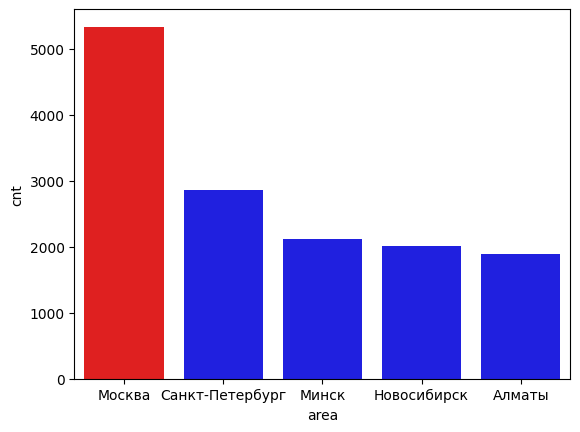

In [55]:
query_4_1 = f'''SELECT a.name area, COUNT(v.area_id) cnt
FROM vacancies v JOIN areas a ON v.area_id = a.id
GROUP BY a.id, a.name
ORDER BY 2 DESC
LIMIT 5
'''
df = pd.read_sql_query(query_4_1, connection)

filtred_color = [('red' if x > 3000 else 'blue') for x in df.cnt]
sns.barplot(df, x='area', y='cnt', palette=filtred_color);

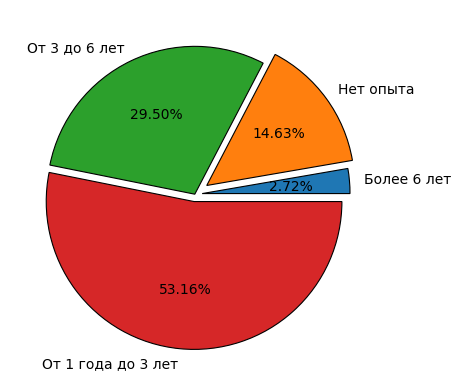

In [56]:
query_4_5 = f'''SELECT experience, COUNT(id)
FROM vacancies
GROUP BY 1
ORDER BY 2
'''
df = pd.read_sql_query(query_4_5, connection)

plt.pie(
    df['count'],
    labels = df['experience'].values,
    autopct = '%.2f%%',
    explode = (0.05, 0.1, 0, 0.05),
    wedgeprops = {'lw':0.8,'edgecolor':'k'},   
);

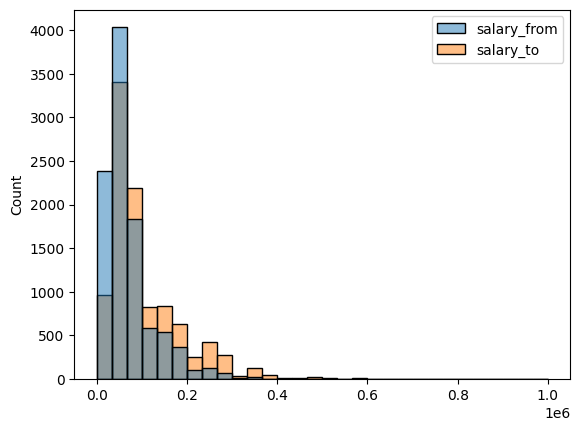

In [57]:
query_4_3 = f'''
SELECT 
    salary_from as salary_from, 
    salary_to as salary_to
FROM 
    vacancies
'''
df = pd.read_sql_query(query_4_3, connection)
df.dropna(inplace=True)
sns.histplot(data=df, bins=30);

In [59]:
connection.close() # При вызове со скобочками, подключение действительно закроется